In [1]:
import os

In [2]:
data_dir = 'C:\Code\Classification on Malaria Infected blood-cells\Data Set\cell_images'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.image import imread

In [5]:
test_path = data_dir + "\\test\\"

In [6]:
train_path = data_dir + "\\train\\"

In [7]:
test_path

'C:\\Code\\Classification on Malaria Infected blood-cells\\Data Set\\cell_images\\test\\'

In [8]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [10]:
os.listdir(train_path + 'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [11]:
para_cell = train_path + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [12]:
imread(para_cell).shape

(148, 142, 3)

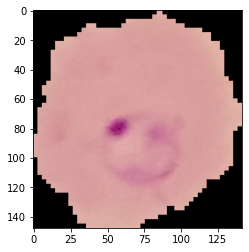

In [13]:
plt.imshow(imread(para_cell))

In [14]:
os.listdir(train_path + 'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [15]:
uninfected_cell =  train_path + 'uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_128.png'

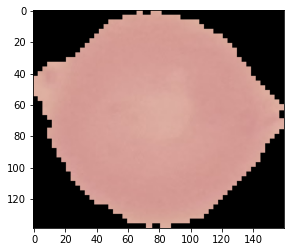

In [16]:
plt.imshow(imread(uninfected_cell))

In [17]:
len(os.listdir(train_path + 'parasitized'))

12480

In [18]:
len(os.listdir(train_path + 'uninfected'))

12480

In [19]:
len(os.listdir(test_path + 'parasitized'))

1300

In [20]:
len(os.listdir(test_path + 'uninfected'))

1300

In [21]:
# checking out dimensions of images.

dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

C:\Users\Sanket Patel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x576 with 0 Axes>

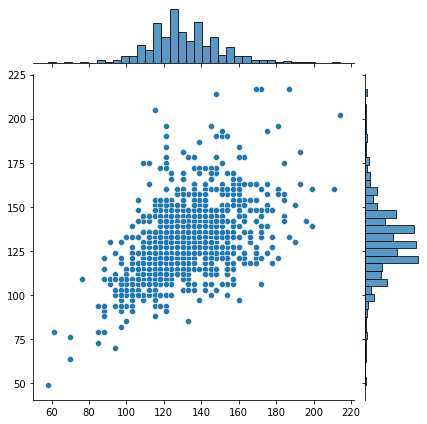

In [23]:
# checking out distribution of dimensions 1 & 2.

plt.figure(figsize=(12,8))
sns.jointplot(dim1,dim2)

In [24]:
np.mean(dim1)

130.92538461538462

In [25]:
np.mean(dim2)

130.75

In [26]:
#default image size for the model

image_shape = (130,130,3)

In [27]:
# we will generate new fake images so that we have more cell images to train on

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
imread(uninfected_cell).max()

0.88235295

In [31]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               shear_range=0.1, #cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

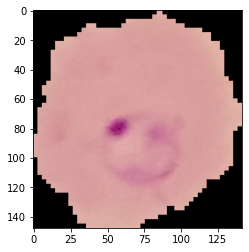

In [37]:
plt.imshow(imread(para_cell))

In [39]:
para_image = imread(para_cell)

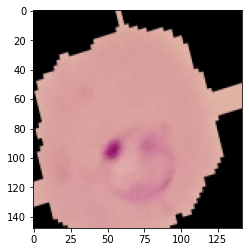

In [40]:
#Sample of generated fake image

plt.imshow(image_gen.random_transform(para_image))

In [41]:
train_path

'C:\\Code\\Classification on Malaria Infected blood-cells\\Data Set\\cell_images\\train\\'

In [42]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [43]:
test_path

'C:\\Code\\Classification on Malaria Infected blood-cells\\Data Set\\cell_images\\test\\'

In [44]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [46]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Training the Model

In [50]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module tensorflow.python.keras.preprocessing.image:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest') method of tensorflow.python.keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    Arguments:
        directory: string, path to the target directory. It should contain one
          subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images inside
          each of the subdirectories directory tree will be included in the
          generator. See [this script](
            https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
              for more details.
        target_size: Tuple of integers `(height, width)`, defaults to `(256,
         

In [52]:
batch_size = 16

In [53]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [54]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [55]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1560/1560 [==============================] - 462s 296ms/step - loss: 0.9634 - accuracy: 0.5383 - val_loss: 0.6822 - val_accuracy: 0.5685
Epoch 2/20
1560/1560 [==============================] - 241s 155ms/step - loss: 0.6816 - accuracy: 0.5686 - val_loss: 0.6748 - val_accuracy: 0.5735
Epoch 3/20
1560/1560 [==============================] - 257s 164ms/step - loss: 0.6739 - accuracy: 0.5866 - val_loss: 0.6771 - val_accuracy: 0.5900
Epoch 4/20
1560/1560 [==============================] - 241s 155ms/step - loss: 0.6720 - accuracy: 0.5918 - val_loss: 0.5996 - val_accuracy: 0.6327
Epoch 5/20
1560/1560 [==============================] - 240s 154ms/step - loss: 0.6870 - accuracy: 0.6109 - val_loss: 0.6637 - val_accuracy: 0.6162
Epoch 6/20
1560/1560 [==============================] - 240s 154ms/step - loss: 0.3994 - accuracy: 0.8058 - val_loss: 0.1994 - val_accuracy: 0.9277
Epoch 7/20
1560/1560 [==============

In [58]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

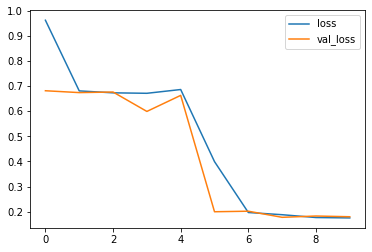

In [59]:
losses[['loss','val_loss']].plot()

In [60]:
model.metrics_names

['loss', 'accuracy']

In [61]:
model.evaluate_generator(test_image_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.18001879751682281, 0.9415384531021118]

In [62]:
from tensorflow.keras.preprocessing import image

In [63]:
pred_probabilities = model.predict_generator(test_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [64]:
pred_probabilities

array([[8.7019801e-04],
       [9.6540971e-06],
       [3.3443230e-05],
       ...,
       [8.5321140e-01],
       [9.2048293e-01],
       [8.7114775e-01]], dtype=float32)

In [65]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [66]:
predictions = pred_probabilities > 0.5

In [67]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1300
           1       0.92      0.96      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [70]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1194,  106],
       [  53, 1247]], dtype=int64)

## Predicting on test image

In [71]:
para_cell

'C:\\Code\\Classification on Malaria Infected blood-cells\\Data Set\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [72]:
my_image = image.load_img(para_cell,target_size=image_shape)

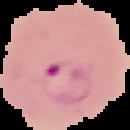

In [73]:
my_image

In [74]:
type(my_image)

PIL.Image.Image

In [75]:
my_image = image.img_to_array(my_image)

In [76]:
my_image.shape

(130, 130, 3)

In [77]:
my_image = np.expand_dims(my_image, axis=0)

In [78]:
my_image.shape

(1, 130, 130, 3)

In [79]:
model.predict(my_image)

array([[0.00012594]], dtype=float32)

In [80]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

## Model is predicting my_image to be '0' = 'Parasitiaed' blood cell.